# Mini Project 1 Covid-19 Impact on Economies and Employment Sector

Context: 
This template looks at the potential economy- and sector-specific impact of the COVID-19 outbreak. It provides an update to a version released in March 6, 2020. The scenarios and estimates are revised to reflect the escalating and broadening reach of the health crisis. The analysis calculates the overall impact for the developing Asian economies of Bangladesh; Brunei Darussalam; Bhutan; Fiji; Hong Kong, China; Indonesia; India; Kazakhstan; Kyrgyz Republic; Cambodia; Republic of Korea; Sri Lanka; Maldives; Mongolia; Malaysia; Nepal; Pakistan; Philippines; Singapore; Thailand; Taipei,China; and Viet Nam.

Business Question 

Are the developing Nations economies decreasing due to  Covid-19 impacting employment? 


In [2]:
#Here we import the libraries we will be using for this project.

import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
#Here we load the data set and store in the variable covid_19_EI
#We use the pandas library to read the data set

covid_19_EI = pd.read_csv("COVID19EconomicImpact 10Mar2020.csv")

##  1 Undestanding the data

In [4]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.18.1
Pandas:  1.0.1


In [9]:
covid_19_EI

Economy ISO Alpha-3 Country Code  \
0          People's Republic of China                      CHN   
1          People's Republic of China                      CHN   
2          People's Republic of China                      CHN   
3          People's Republic of China                      CHN   
4          People's Republic of China                      CHN   
..                                ...                      ...   
565  Lao People's Democratic Republic                      LAO   
566  Lao People's Democratic Republic                      LAO   
567  Lao People's Democratic Republic                      LAO   
568  Lao People's Democratic Republic                      LAO   
569  Lao People's Democratic Republic                      LAO   

    ADB Country Code                                             Sector  \
0                PRC                  Agriculture, Mining and Quarrying   
1                PRC     Business, Trade, Personal, and Public Services   
2                PRC  Hotel and restaurants and Other Personal Services   
3                PRC  Light/Heavy Manufacturing, Utilities, and Cons...   
4                PRC                                 Transport services   
..               ...                                                ...   
565              LAO     Business, Trade, Personal, and Public Services   
566              LAO  Hotel and restaurants and Other Personal Services   
567              LAO  Light/Heavy Manufacturing, Utilities, and Cons...   
568              LAO                                 Transport services   
569              LAO                                               _All   

    2018 nominal gdp    Scenario  as % of total GDP   in $ Mn  \
0        13608151.86   best case              -0.05   7438.37   
1        13608151.86   best case              -0.12  16153.00   
2        13608151.86   best case              -0.04   5974.23   
3        13608151.86   best case              -0.07   9115.48   
4        13608151.86   best case              -0.04   5208.49   
..               ...         ...                ...       ...   
565        17,953.79  worse case              -0.08     13.58   
566        17,953.79  worse case               0.00      0.78   
567        17,953.79  worse case              -0.05      8.88   
568        17,953.79  worse case              -0.24     43.15   
569        17,953.79  worse case              -0.43     76.52   

     Employment (in 000)  as % of sector GDP  as % of sector employment  
0                1203.76               -0.40                      -0.47  
1                 604.02               -0.29                      -0.29  
2                1997.99               -0.87                      -0.96  
3                 367.50               -0.19                      -0.13  
4                 317.64               -0.87                      -0.79  
..                   ...                 ...                        ...  
565                 2.13               -0.19                      -0.20  
566                 0.11               -0.09                      -0.12  
567                 3.22               -0.17                      -0.49  
568                 3.92              -15.54                      -3.52  
569                12.77               -0.43                      -0.32  

[570 rows x 11 columns]

In [5]:
covid_19_EI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Economy                    570 non-null    object 
 1   ISO Alpha-3 Country Code   570 non-null    object 
 2   ADB Country Code           570 non-null    object 
 3   Sector                     570 non-null    object 
 4   2018 nominal gdp           570 non-null    object 
 5   Scenario                   570 non-null    object 
 6   as % of total GDP          570 non-null    float64
 7   in $ Mn                    570 non-null    float64
 8   Employment (in 000)        570 non-null    float64
 9   as % of sector GDP         570 non-null    float64
 10  as % of sector employment  570 non-null    float64
dtypes: float64(5), object(6)
memory usage: 49.1+ KB


In [6]:
#
#We check the values in the data set and then can determine which columns to drop
covid_19_EI.head()

Economy ISO Alpha-3 Country Code ADB Country Code  \
0  People's Republic of China                      CHN              PRC   
1  People's Republic of China                      CHN              PRC   
2  People's Republic of China                      CHN              PRC   
3  People's Republic of China                      CHN              PRC   
4  People's Republic of China                      CHN              PRC   

                                              Sector 2018 nominal gdp  \
0                  Agriculture, Mining and Quarrying      13608151.86   
1     Business, Trade, Personal, and Public Services      13608151.86   
2  Hotel and restaurants and Other Personal Services      13608151.86   
3  Light/Heavy Manufacturing, Utilities, and Cons...      13608151.86   
4                                 Transport services      13608151.86   

    Scenario  as % of total GDP   in $ Mn  Employment (in 000)  \
0  best case              -0.05   7438.37              1203.76   
1  best case              -0.12  16153.00               604.02   
2  best case              -0.04   5974.23              1997.99   
3  best case              -0.07   9115.48               367.50   
4  best case              -0.04   5208.49               317.64   

   as % of sector GDP  as % of sector employment  
0               -0.40                      -0.47  
1               -0.29                      -0.29  
2               -0.87                      -0.96  
3               -0.19                      -0.13  
4               -0.87                      -0.79

In [12]:
#
#Here we check the last 5 entries of the data set
covid_19_EI.tail()

Economy ISO Alpha-3 Country Code  \
565  Lao People's Democratic Republic                      LAO   
566  Lao People's Democratic Republic                      LAO   
567  Lao People's Democratic Republic                      LAO   
568  Lao People's Democratic Republic                      LAO   
569  Lao People's Democratic Republic                      LAO   

    ADB Country Code                                             Sector  \
565              LAO     Business, Trade, Personal, and Public Services   
566              LAO  Hotel and restaurants and Other Personal Services   
567              LAO  Light/Heavy Manufacturing, Utilities, and Cons...   
568              LAO                                 Transport services   
569              LAO                                               _All   

    2018 nominal gdp    Scenario  as % of total GDP  in $ Mn  \
565        17,953.79  worse case              -0.08    13.58   
566        17,953.79  worse case               0.00     0.78   
567        17,953.79  worse case              -0.05     8.88   
568        17,953.79  worse case              -0.24    43.15   
569        17,953.79  worse case              -0.43    76.52   

     Employment (in 000)  as % of sector GDP  as % of sector employment  
565                 2.13               -0.19                      -0.20  
566                 0.11               -0.09                      -0.12  
567                 3.22               -0.17                      -0.49  
568                 3.92              -15.54                      -3.52  
569                12.77               -0.43                      -0.32

In [8]:
#Now we check the shape of the data
covid_19_EI.shape


(570, 11)

In [9]:
#So from the shape we can identify that their are 570 rows and 11 columns

In [7]:
covid_19_EI.describe()

as % of total GDP        in $ Mn  Employment (in 000)  \
count         570.000000     570.000000           570.000000   
mean           -0.267175    2891.651456           264.441579   
std             0.509052   16669.432379          1427.808618   
min            -4.960000       0.020000             0.000000   
25%            -0.260000       8.740000             0.695000   
50%            -0.080000     100.570000             7.195000   
75%            -0.020000     679.427500            45.290000   
max             0.000000  236925.790000         19634.340000   

       as % of sector GDP  as % of sector employment  
count          570.000000                 570.000000  
mean            -1.463018                  -1.391947  
std              2.793952                   2.674746  
min            -25.740000                 -25.740000  
25%             -1.535000                  -1.530000  
50%             -0.465000                  -0.470000  
75%             -0.090000                  -0.080000  
max              0.000000                   0.000000

In [11]:

covid_19_EI.columns

Index(['Economy', 'ISO Alpha-3 Country Code', 'ADB Country Code', 'Sector',
       '2018 nominal gdp', 'Scenario', 'as % of total GDP', 'in $ Mn',
       'Employment (in 000)', 'as % of sector GDP',
       'as % of sector employment'],
      dtype='object')

In [13]:
covid_19_EI.nunique()
#Here we can observe the unique values in each column for example 24 unique values for Economy
# and 4 values for scenario


Economy                       24
ISO Alpha-3 Country Code      24
ADB Country Code              24
Sector                         6
2018 nominal gdp              24
Scenario                       4
as % of total GDP            108
in $ Mn                      555
Employment (in 000)          455
as % of sector GDP           246
as % of sector employment    227
dtype: int64

In [15]:
#To check a specific value for a column we can use this method
covid_19_EI['Scenario'].unique()
# We can observe below ordinal categorical values

array(['best case', 'moderate case', 'worse case',
       'hypothetical worst case'], dtype=object)

## Cleaning the data

In [8]:
covid_19_EI.isnull().sum()

Economy                      0
ISO Alpha-3 Country Code     0
ADB Country Code             0
Sector                       0
2018 nominal gdp             0
Scenario                     0
as % of total GDP            0
in $ Mn                      0
Employment (in 000)          0
as % of sector GDP           0
as % of sector employment    0
dtype: int64

In [17]:
#In this scenario  we have 0 null values so we don't have to worry about 
#dropping any column just because their is no value or# replacing it with another values
#but in some cases in some data sets although this data set is large in some data sets their we can choose to replace
#or drop columns . but in this data set we don't need to do it.

In [18]:
#Next we will go on to drop redundant data which will not affect our performance 

In [9]:
# We drop this column as it is similar to ADB country code and it is redundant so we drop this column.
covid_Eco =  covid_19_EI.drop(['ISO Alpha-3 Country Code'], axis=1)



In [10]:
#We can check that we have dropped the ISO code column
covid_Eco.head()

Economy ADB Country Code  \
0  People's Republic of China              PRC   
1  People's Republic of China              PRC   
2  People's Republic of China              PRC   
3  People's Republic of China              PRC   
4  People's Republic of China              PRC   

                                              Sector 2018 nominal gdp  \
0                  Agriculture, Mining and Quarrying      13608151.86   
1     Business, Trade, Personal, and Public Services      13608151.86   
2  Hotel and restaurants and Other Personal Services      13608151.86   
3  Light/Heavy Manufacturing, Utilities, and Cons...      13608151.86   
4                                 Transport services      13608151.86   

    Scenario  as % of total GDP   in $ Mn  Employment (in 000)  \
0  best case              -0.05   7438.37              1203.76   
1  best case              -0.12  16153.00               604.02   
2  best case              -0.04   5974.23              1997.99   
3  best case              -0.07   9115.48               367.50   
4  best case              -0.04   5208.49               317.64   

   as % of sector GDP  as % of sector employment  
0               -0.40                      -0.47  
1               -0.29                      -0.29  
2               -0.87                      -0.96  
3               -0.19                      -0.13  
4               -0.87                      -0.79

## Analyse the relationships

In [21]:
corelation = covid_Eco.corr()
corelation

as % of total GDP   in $ Mn  Employment (in 000)  \
as % of total GDP                   1.000000 -0.221473            -0.206267   
in $ Mn                            -0.221473  1.000000             0.928494   
Employment (in 000)                -0.206267  0.928494             1.000000   
as % of sector GDP                  0.346945 -0.013257            -0.013748   
as % of sector employment           0.353065 -0.024659            -0.026853   

                           as % of sector GDP  as % of sector employment  
as % of total GDP                    0.346945                   0.353065  
in $ Mn                             -0.013257                  -0.024659  
Employment (in 000)                 -0.013748                  -0.026853  
as % of sector GDP                   1.000000                   0.961672  
as % of sector employment            0.961672                   1.000000

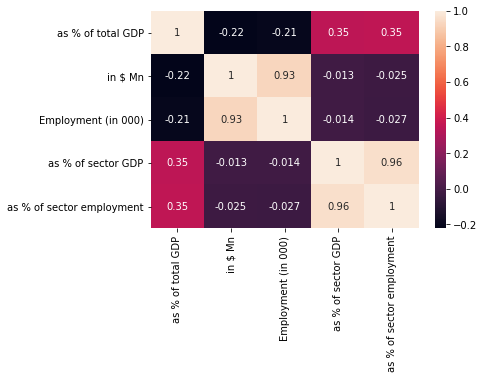

In [22]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

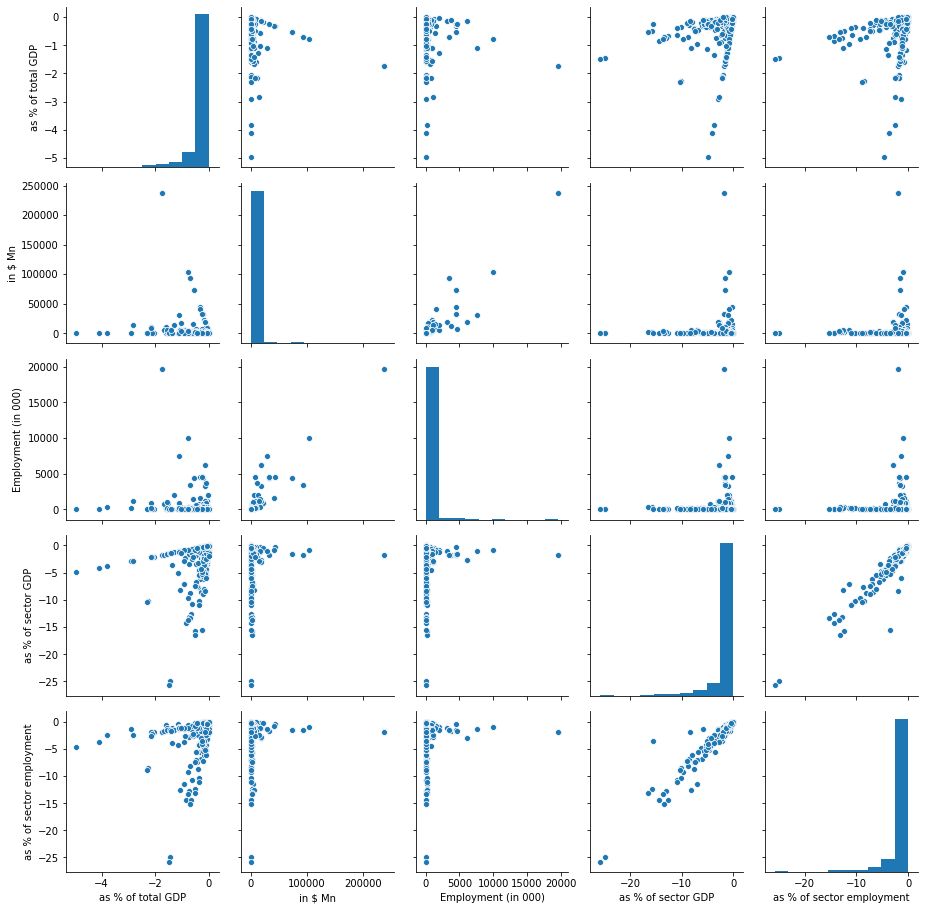

In [35]:
sns.pairplot(covid_Eco)

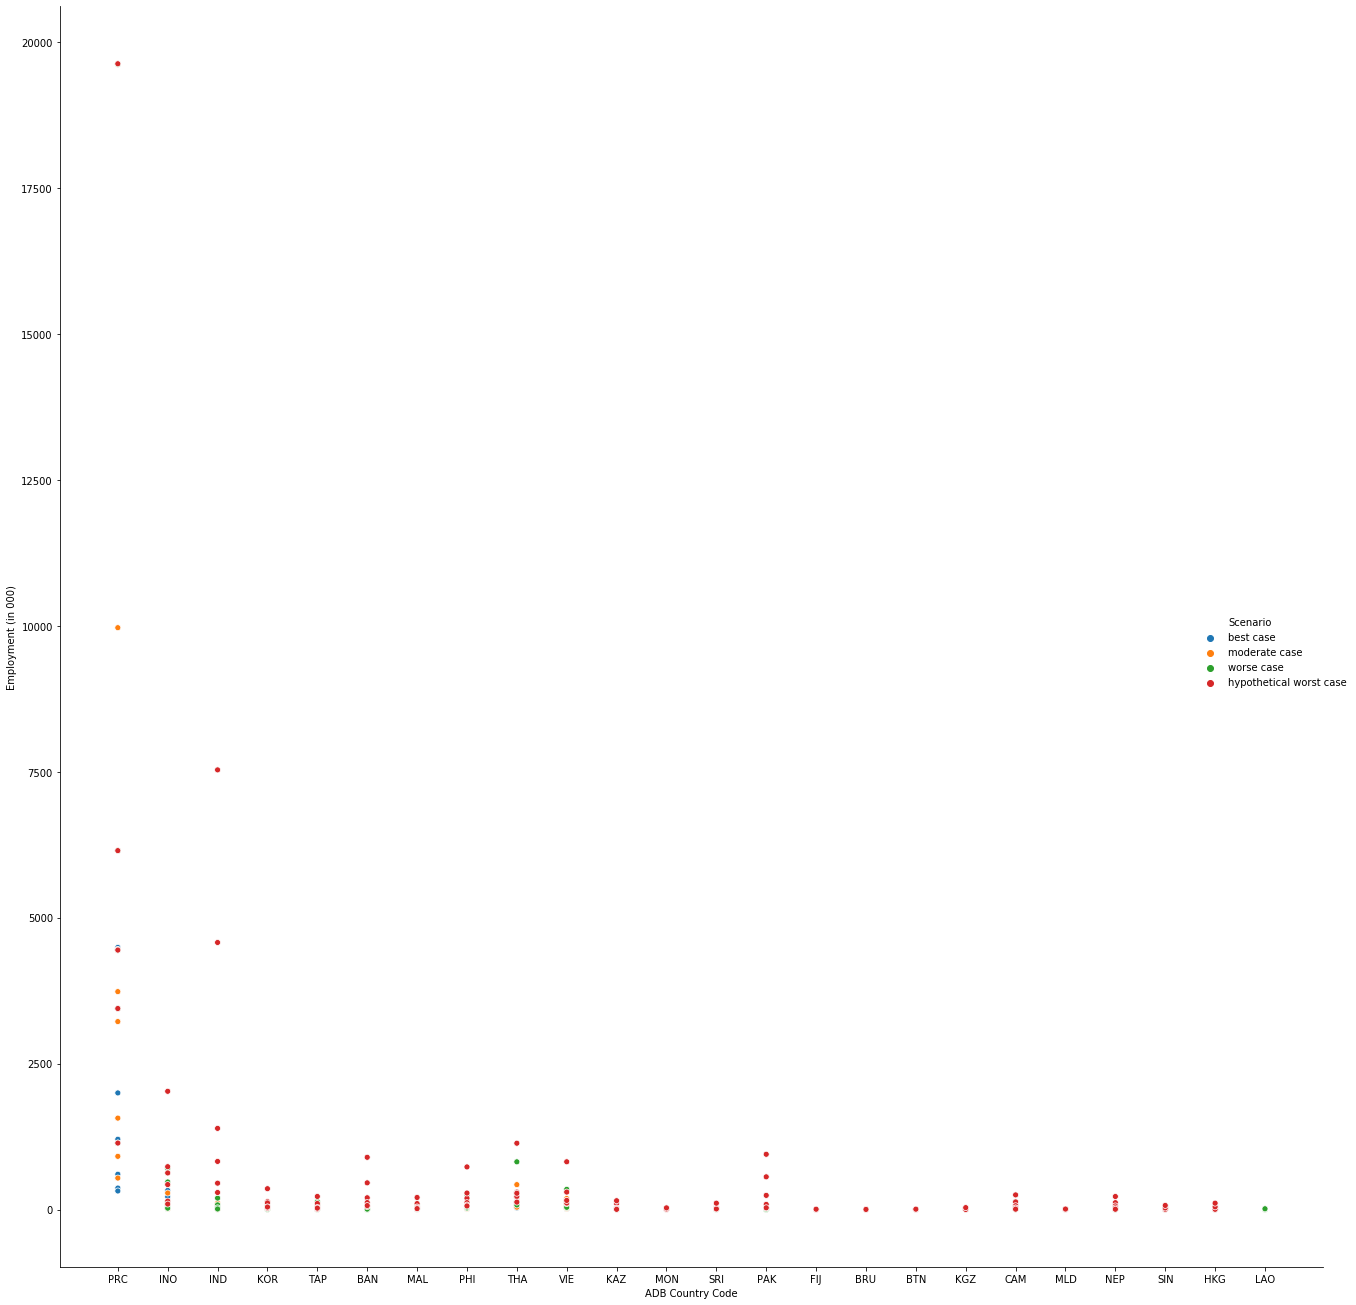

In [23]:
sns.relplot(x='ADB Country Code', y='Employment (in 000)', hue='Scenario', data=covid_Eco)
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
fig.savefig('test2png.png', dpi=200)



In [24]:
#
#
#From the above we can observe that their is decline in the economy as their is lesseser employment. Their is a higher proportion
#of decline in Economy of the countries.

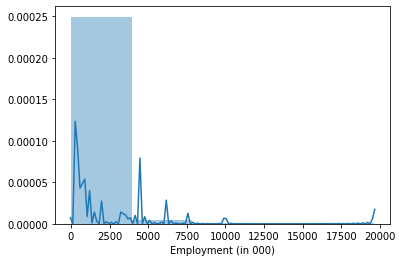

In [25]:
sns.distplot(covid_Eco['Employment (in 000)'], bins=5)

Index(['Economy', 'ADB Country Code', 'Sector', '2018 nominal gdp', 'Scenario',
       'as % of total GDP', 'in $ Mn', 'Employment (in 000)',
       'as % of sector GDP', 'as % of sector employment'],
      dtype='object')

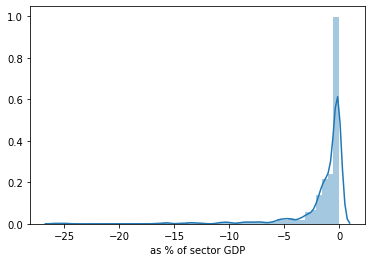

In [83]:
sns.distplot(covid_Eco['as % of sector GDP'])

covid_Eco.columns



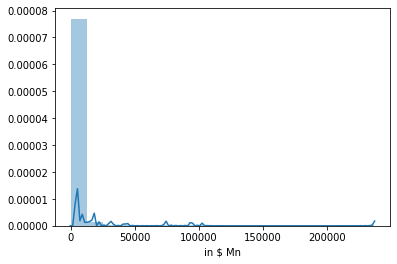

In [26]:
sns.distplot(covid_Eco['in $ Mn'] ,bins=19)


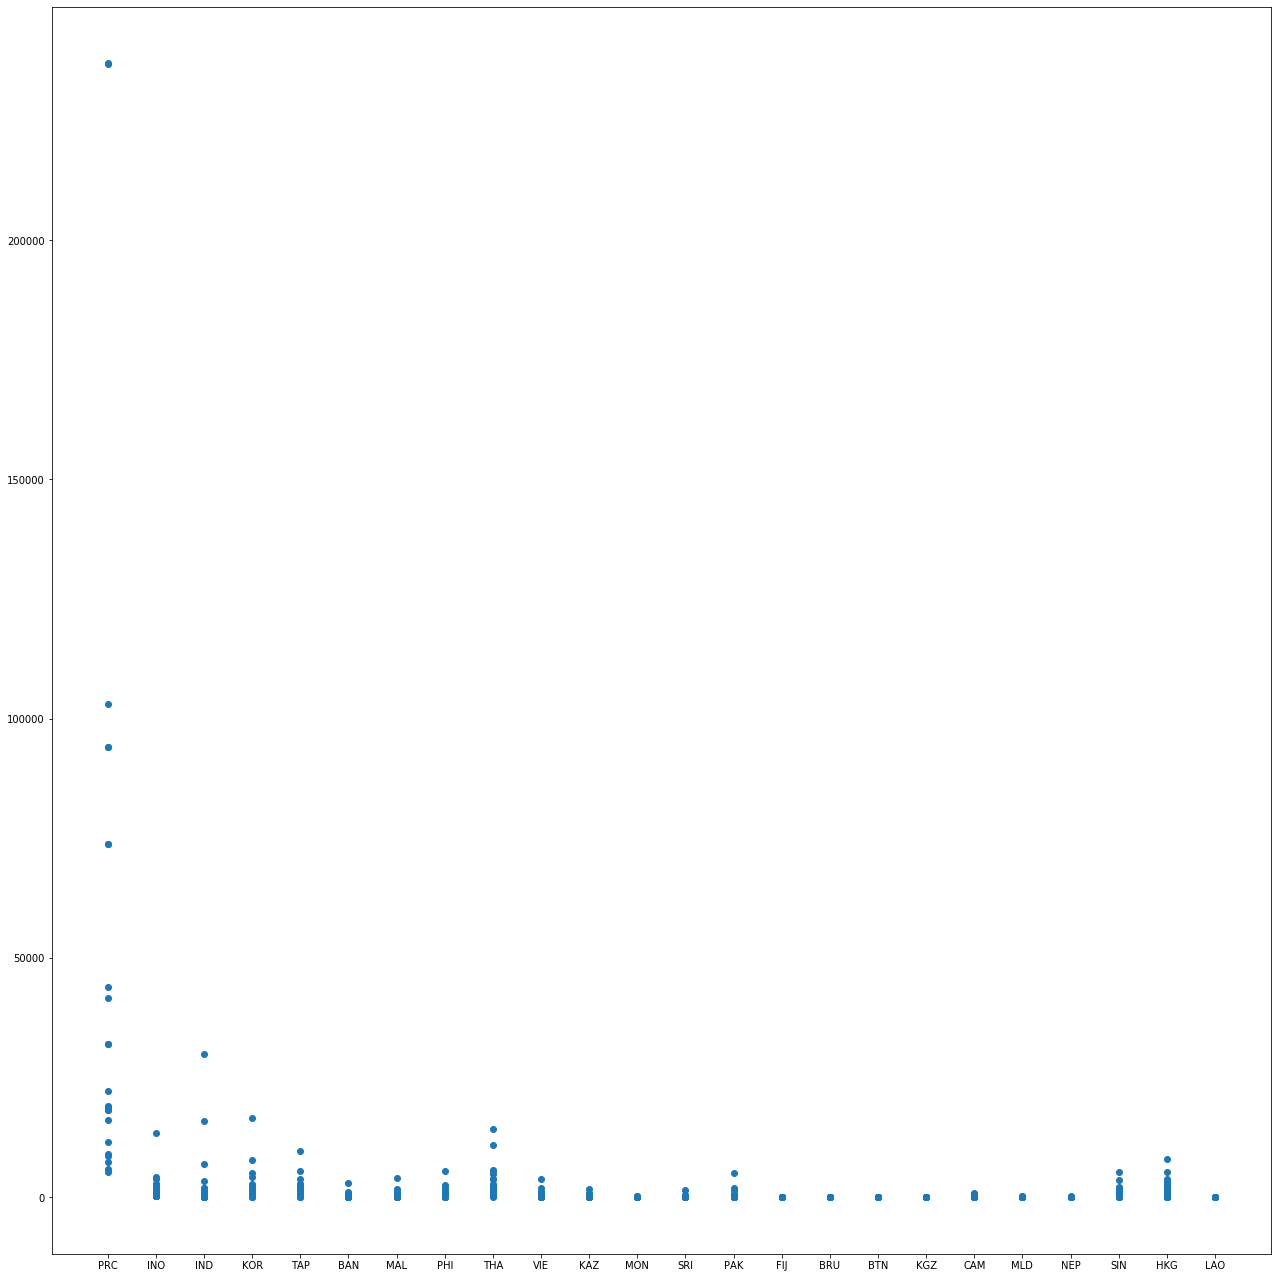

In [117]:
plt.scatter(covid_Eco['ADB Country Code'], covid_Eco['in $ Mn'])
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('test2png.png', dpi=500)

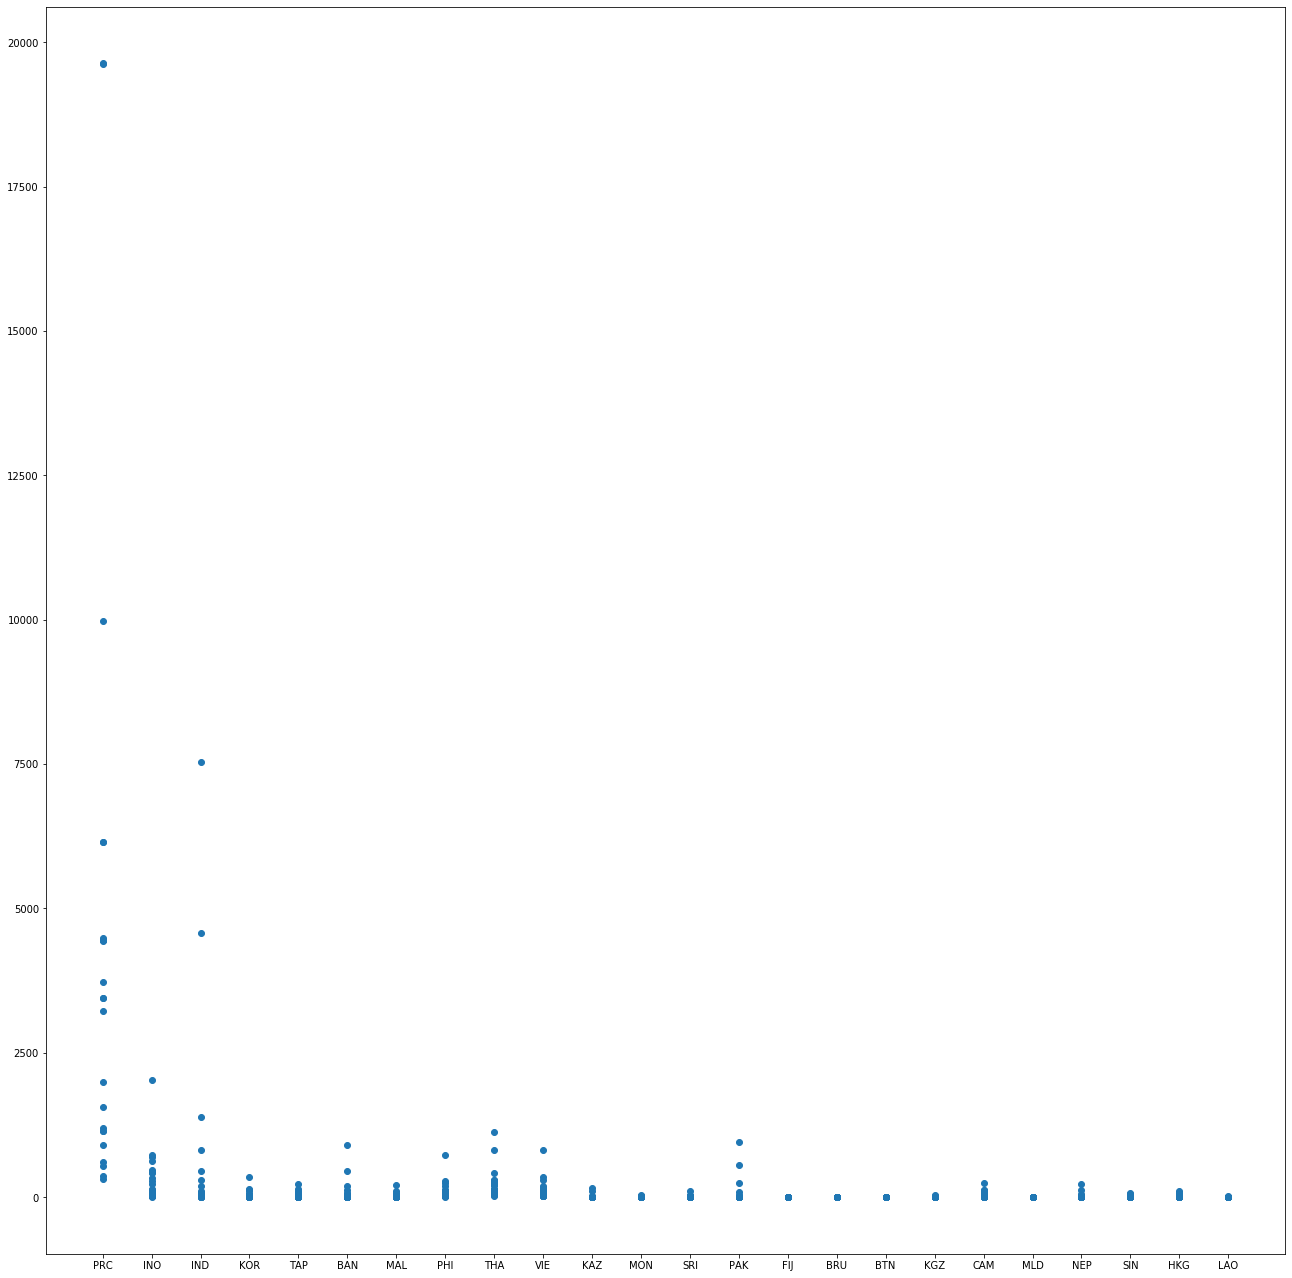

In [118]:
plt.scatter(covid_Eco['ADB Country Code'], covid_Eco['Employment (in 000)'])
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('test2png.png', dpi=500)

In [ ]:
## 

## Data Profiling


### Counts

When there are categorical variables in a dataset we will want to know how many possible values there are in each column. (Nb. If the dataset is a sample of a larger one, our sample may not capture all possible values of every categorical.)


How many (different) Economies are their and employment sectors?

In [27]:
#ANSWER
covid_Eco['Economy'].value_counts()

Philippines                         24
Kazakhstan                          24
Taipei,China                        24
Bangladesh                          24
Viet Nam                            24
Cambodia                            24
Hong Kong, China                    24
Maldives                            24
Republic of Korea                   24
Indonesia                           24
Thailand                            24
Kyrgyz Republic                     24
Sri Lanka                           24
Malaysia                            24
Mongolia                            24
Bhutan                              24
Pakistan                            24
Singapore                           24
Fiji                                24
People's Republic of China          24
Brunei Darussalam                   24
Nepal                               24
India                               24
Lao People's Democratic Republic    18
Name: Economy, dtype: int64

In [28]:
covid_Eco['Sector'].value_counts()

Agriculture, Mining and Quarrying                         95
_All                                                      95
Business, Trade, Personal, and Public Services            95
Transport services                                        95
Light/Heavy Manufacturing, Utilities, and Construction    95
Hotel and restaurants and Other Personal Services         95
Name: Sector, dtype: int64

### Ranges

Print the range of the `Economy`, `Employment`, and `Sector` columns: 

In [29]:
#ANSWER
print('Economy:', covid_Eco['Economy'].min(), 'to', covid_Eco['Economy'].max())
print('Employment:', covid_Eco['Employment (in 000)'].min(), 'to', covid_Eco['Employment (in 000)'].max())
print('Sector:', covid_Eco['Sector'].min(), 'to', covid_Eco['Sector'].max())

Economy: Bangladesh to Viet Nam
Employment: 0.0 to 19634.34
Sector: Agriculture, Mining and Quarrying to _All


In [30]:
covid_Eco.columns

Index(['Economy', 'ADB Country Code', 'Sector', '2018 nominal gdp', 'Scenario',
       'as % of total GDP', 'in $ Mn', 'Employment (in 000)',
       'as % of sector GDP', 'as % of sector employment'],
      dtype='object')

In [31]:
covid_Eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Economy                    570 non-null    object 
 1   ADB Country Code           570 non-null    object 
 2   Sector                     570 non-null    object 
 3   2018 nominal gdp           570 non-null    object 
 4   Scenario                   570 non-null    object 
 5   as % of total GDP          570 non-null    float64
 6   in $ Mn                    570 non-null    float64
 7   Employment (in 000)        570 non-null    float64
 8   as % of sector GDP         570 non-null    float64
 9   as % of sector employment  570 non-null    float64
dtypes: float64(5), object(5)
memory usage: 44.7+ KB


Compute and print the overall minimum and maximum of the numeric data columns:

In [33]:
covid_19_min, covid_19_max = (min(covid_Eco.min(numeric_only=True)), 
                        max(covid_Eco.max(numeric_only=True)))
covid_19_min, covid_19_max

(-25.74, 236925.79)

In [37]:
def check_min_max(covid_Eco):
    # Check min, max of each column
    print(covid_Eco.describe().T[['min', 'max']])

In [38]:
check_min_max(covid_Eco)

                             min        max
as % of total GDP          -4.96       0.00
in $ Mn                     0.02  236925.79
Employment (in 000)         0.00   19634.34
as % of sector GDP        -25.74       0.00
as % of sector employment -25.74       0.00


## Statistical Proof

In [39]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [41]:
# Shape
covid_Eco.shape

(570, 10)

##### 1. Plot Histogram of `Employment

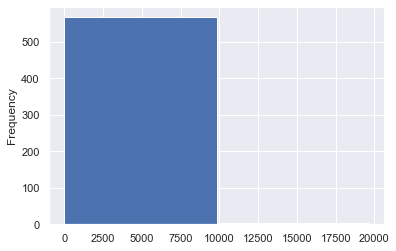

In [47]:
#  ANSWER
Employment = covid_Eco['Employment (in 000)']
Employment.plot(kind='hist',bins=2);

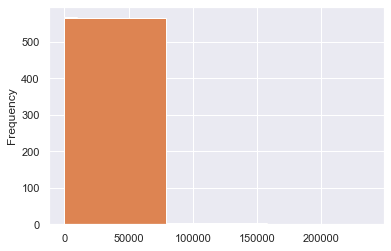

In [63]:
#                             min        max
#as % of total GDP          -4.96       0.00
#in $ Mn                     0.02  236925.79
#Employment (in 000)         0.00   19634.34
#as % of sector GDP        -25.74       0.00
#as % of sector employment 


Employment = covid_Eco['Employment (in 000)']
Employment.plot(kind='hist',bins=2);

Price = covid_Eco['in $ Mn']
Price.plot(kind='hist', bins=3);

##### 2. Plot Histogram of Price

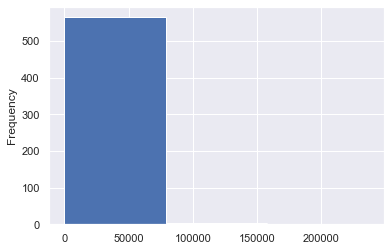

In [66]:
Price = covid_Eco['in $ Mn']
Price.plot(kind='hist', bins=3);

##### 3.A Draw Scatter Plot of `Employment and Price

In [67]:
#We use this to identify if the employement has affected in decline of the economy

In [85]:
# ANSWER
covid_Eco['Employment (in 000)'].mean()

264.4415789473686

In [89]:
#sns.lmplot(x="Employment (in 000)", y="in $ Mn ", data=covid_Eco);
covid_Eco['in $ Mn'].mean()


2891.6514561403496

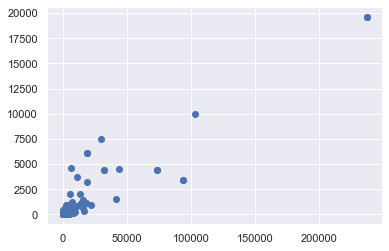

In [90]:
plt.scatter(x='in $ Mn',y='Employment (in 000)', data=covid_Eco)

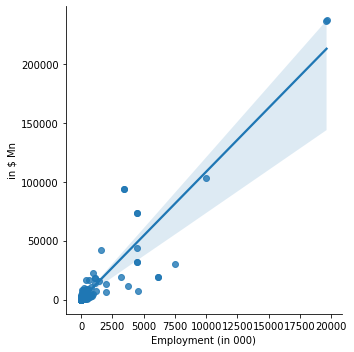

In [65]:
sns.lmplot(x="Employment (in 000)", y="in $ Mn", data=covid_Eco);

The trends we can see in the data set are that we can see as employment increases the economies price also increases but if they are lower so does their is decrease in the economy. We can also spot the impact of covid 19 due to 

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

## 4. Define Hypothesis

Let's assume if value in millions is more than employment will be more. Price in millions increases when employement increases.
Other than that if price is small employement is small. Thus decrease in Economy.


**ANSWER:**

    H0: There is no difference between distribution of `Employment` & `Price in millions`
    H1: There is difference between distribution of `Employment` & `Price in millions`
    


##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [1]:
# ANSWER
alpha = 0.05

In [15]:
Employment_Eco = covid_Eco['Employment (in 000)']
Price_Eco   =  covid_Eco['in $ Mn']

In [11]:
covid_Eco.columns

Index(['Economy', 'ADB Country Code', 'Sector', '2018 nominal gdp', 'Scenario',
       'as % of total GDP', 'in $ Mn', 'Employment (in 000)',
       'as % of sector GDP', 'as % of sector employment'],
      dtype='object')

#####  Build histogram for Employment and Price

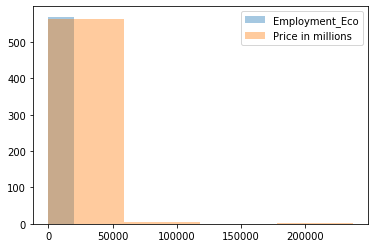

In [27]:
# ANSWER
ax = sns.distplot(Employment_Eco , label='Employment_Eco', kde=False,bins=1);
sns.distplot(Price_Eco, ax=ax, label='Price in millions', kde=False,bins=4);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();

From this histogram we cannot approximate the trends of this data. We can observe that employement and price is stagnant meaning 
it is on the same level, no change.

7. Calculate Variance
Calculate variance for both samples.

In [29]:
# ANSWER
var_Employment = Employment_Eco.var()
print(var_Employment)
var_Price = Price_Eco.var()
print(var_Price)

2038637.4495605966
277869975.8445298


In [31]:
# ddof should be 1
np.var(Employment_Eco, ddof=1)

2038637.4495605966

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

In [36]:
# ANSWER
std = np.sqrt((Employment_Eco + Price_Eco) / 2)
print('std dev:', std)

std dev: 0      65.734808
1      91.534201
2      63.135648
3      68.858478
4      52.564865
         ...    
565     2.802677
566     0.667083
567     2.459675
568     4.851288
569     6.681691
Length: 570, dtype: float64


##### 9. Calculate test statistic

In [37]:
# ANSWER
N= 500
t = (Employment_Eco.mean() - Price_Eco.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: 0       -631.930581
1       -453.817644
2       -657.945821
3       -603.263922
4       -790.258584
           ...     
565   -14821.483602
566   -62270.846150
567   -16888.344725
568    -8562.639722
569    -6216.964091
Length: 570, dtype: float64


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [35]:
# ANSWER
df = 2 * N - 2
df

998

##### 11. Find the p-value


Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [38]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

t = 0       -631.930581
1       -453.817644
2       -657.945821
3       -603.263922
4       -790.258584
           ...     
565   -14821.483602
566   -62270.846150
567   -16888.344725
568    -8562.639722
569    -6216.964091
Length: 570, dtype: float64
p = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [39]:
# ANSWER
# Null Hypothesis Dictionary
#    H0: There is no difference between distribution of `Employment` & `Price in millions`
#    H1: There is difference between distribution of `Employment` & `Price in millions`
null_hypothesis = {
    'H0': "Employment doesn't increase prices in Economy"
    , 'H1': "Their is price increases for Economy due to more employment."
}

In [40]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [44]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
#print_sig(p*2, alpha)

t = 0       -631.930581
1       -453.817644
2       -657.945821
3       -603.263922
4       -790.258584
           ...     
565   -14821.483602
566   -62270.846150
567   -16888.344725
568    -8562.639722
569    -6216.964091
Length: 570, dtype: float64
p = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0

We reject our null hyothesis and accept that the price in millions increases due to more employment. Thus economy is better if their is more employment.

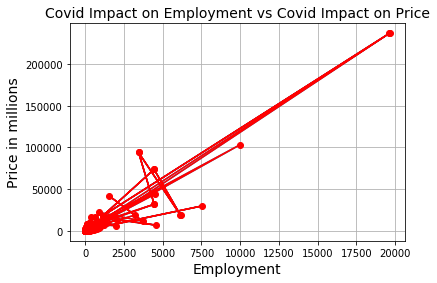

In [50]:
plt.plot(covid_Eco['Employment (in 000)'],covid_Eco['in $ Mn'])

plt.plot(covid_Eco['Employment (in 000)'] ,covid_Eco['in $ Mn'], color='red', marker='o')
plt.title('Covid Impact on Employment vs Covid Impact on Price', fontsize=14)
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Price in millions', fontsize=14)
plt.grid(True)
plt.show()

In [45]:
covid_Eco.columns

Index(['Economy', 'ADB Country Code', 'Sector', '2018 nominal gdp', 'Scenario',
       'as % of total GDP', 'in $ Mn', 'Employment (in 000)',
       'as % of sector GDP', 'as % of sector employment'],
      dtype='object')

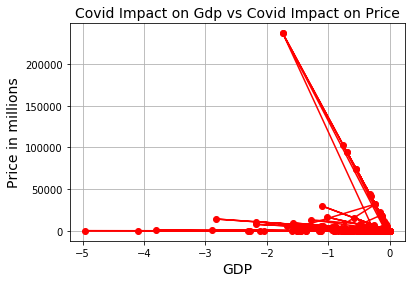

In [53]:

#plt.plot(covid_Eco['as % of total GDP'] ,covid_Eco['in $ Mn'], color='red', marker='o')
#plt.title('Covid Impact on Gdp vs Covid Impact on Price', fontsize=14)
#plt.xlabel('GDP', fontsize=14)
#plt.ylabel('Price in millions', fontsize=14)
#plt.grid(True)
#plt.show()

##### . What is the standard error of the mean? 

In [54]:
covid_Eco['Employment (in 000)'].mean()

264.4415789473686

In [55]:
covid_Eco['in $ Mn'].mean()

2891.6514561403496

In [56]:
covid_Eco['Employment (in 000)'].std()

1427.8086179739205

In [57]:
covid_Eco['in $ Mn'].std()

16669.432379194255

In [58]:
n = 9
Xsdev = 1427.8086179739205
Xsem = Xsdev / math.sqrt(n)
Xsem

475.93620599130685

(Hint: When you have multiple samples and want to describe the standard deviation of those sample means (the standard error), you would use this z score formula:
```
z = (x – μ) / (σ / √n)
```
This z-score will tell you how many standard errors there are between the sample mean and the population mean.



In [59]:
# ANSWER
# z = (sample mean - population mean) / Xsem
z = (264.4415789473686
 - 2891.6514561403496) / Xsem
p = stats.norm.cdf(z)
p

1.6941468825646334e-08

In [61]:

if (1 - p) >= 0.99:
    print('Employment decreases Economy price  99% confidence interval.')
else:
    print('Employment increase Economy price at a 99% confidence interval.')

Employment decreases Economy price  99% confidence interval.


In [63]:
# ANSWER
# increase the number of patients in the diet study!
n = 1000
p = stats.norm.cdf((264.4415789473686 - 2891.6514561403496) / (Xsdev / math.sqrt(n)))
print(p)
if (1 - p) >= 0.99:
    print('For a sample size of', n, 'jobs, Employment Economy decreases due to covid 19 impact.')
else:
    print('For a sample size of', n, 'jobs, Employment Economy increases due to covid 19 impact')

0.0
For a sample size of 1000 jobs, Employment Economy decreases due to covid 19 impact.
